In [1]:
#importing the python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset to a Pandas Dataframe
data=pd.read_csv('aerofit.csv')

In [4]:
#Check first 5 record of DF to understand the data provided
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
#Checking the Dataset datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [3]:
#Convert the columns to categorical dtype wherever applicable
data['Product']=data['Product'].astype('category')
data['Gender']=data['Gender'].astype('category')
data['MaritalStatus']=data['MaritalStatus'].astype('category')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [8]:
#Product Purchased:	KP281, KP481, or KP781
#Age:	In years
#Gender:	Male/Female
#Education:	In years
#MaritalStatus:	Single or partnered
#Usage:	The average number of times the customer plans to use the treadmill each week.
#Income:	Annual income (in $)
#Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
#Miles:	The average number of miles the customer expects to walk/run each week

In [9]:
#Checking the data set size
data.shape

#Dataset has 180 rows x 9 columns

(180, 9)

In [10]:
#Statistical Analysis of the Dataset
data.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [4]:
#Calculating the Inter-Quartile Range for the numeric columns
description=data.describe().loc[['25%','75%']]
description=description.T
description['IQR']=description['75%']-description['25%']
description['Lower Limit']=description['25%']-1.5*description['IQR']
description['Upper Limit']=description['75%']+1.5*description['IQR']
description

,25%,75%,IQR,Lower Limit,Upper Limit
Age,24.00,33.00,9.00,10.500,46.500
Education,14.00,16.00,2.00,11.000,19.000
Usage,3.00,4.00,1.00,1.500,5.500
Fitness,3.00,4.00,1.00,1.500,5.500
Income,44058.75,58668.00,14609.25,22144.875,80581.875
Miles,66.00,114.75,48.75,-7.125,187.875


# Significant Variance between the mean and 50% value in column Age, Income and Miles indicate presence of outliers in the data

In [10]:
#Checking how many null entries we have across all the columns
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [11]:
#Checking the number of unique values in each columns
data.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [12]:
#checking the value counts of each column to check for any inconsistencies
for i in list(data.columns):
    print("Column" ,i,":")
    print(data[i].value_counts())
    print()

Column Product :
KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

Column Age :
25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

Column Gender :
Male      104
Female     76
Name: Gender, dtype: int64

Column Education :
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

Column MaritalStatus :
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

Column Usage :
3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

Column Fitness :
3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

Column Income :
45480    14
52302     9
46617     8
54576     8
53439     8
         ..
65220     1
55713     1
68220     1
30699 

In [5]:
#Creating Age brackets to club data 
data['AgeGroup']=data['Age'].apply(lambda x : '40-50' if x>=40 else '30-39' if x>=30 else '18-29')

In [6]:
#Creating Income brackets to club income data
data['IncomeGroup']=data['Income'].apply(lambda x : '90k+' if x>=90000 else '70k-90k' if x>=70000 \
                                          else '50k-70k' if x>=50000 else '30k-50k' if x>=30000 else '<30k')

In [7]:
#Adding Price Information of Product
data['Price']=data['Product'].apply(lambda x: 1500 if x=='KP281' else 1750 if x=='KP481' else 2500)

# Univariate Analysis

In [8]:
data.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,IncomeGroup,Price
0,KP281,18,Male,14,Single,3,4,29562,112,18-29,<30k,1500
1,KP281,19,Male,15,Single,2,3,31836,75,18-29,30k-50k,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,18-29,30k-50k,1500
3,KP281,19,Male,12,Single,3,3,32973,85,18-29,30k-50k,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,18-29,30k-50k,1500
5,KP281,20,Female,14,Partnered,3,3,32973,66,18-29,30k-50k,1500
6,KP281,21,Female,14,Partnered,3,3,35247,75,18-29,30k-50k,1500
7,KP281,21,Male,13,Single,3,3,32973,85,18-29,30k-50k,1500
8,KP281,21,Male,15,Single,5,4,35247,141,18-29,30k-50k,1500
9,KP281,21,Female,15,Partnered,2,3,37521,85,18-29,30k-50k,1500


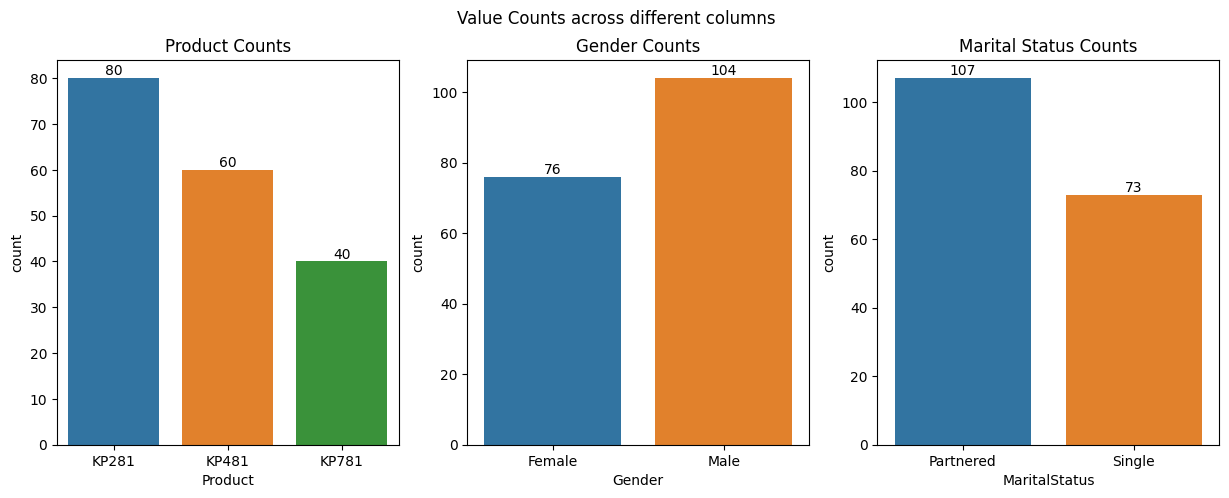

In [7]:
#Checking Count distribution of the values in each of the columns

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
a=sns.countplot(x=data.Product)
plt.title('Product Counts', fontsize=12)
a.bar_label(a.containers[0])

plt.subplot(1,3,2)
b=sns.countplot(x=data.Gender)
plt.title('Gender Counts', fontsize=12)
b.bar_label(b.containers[0])


plt.subplot(1,3,3)
c=sns.countplot(x=data.MaritalStatus)
plt.title('Marital Status Counts', fontsize=12)
c.bar_label(c.containers[0])

plt.suptitle('Value Counts across different columns ')
plt.show()

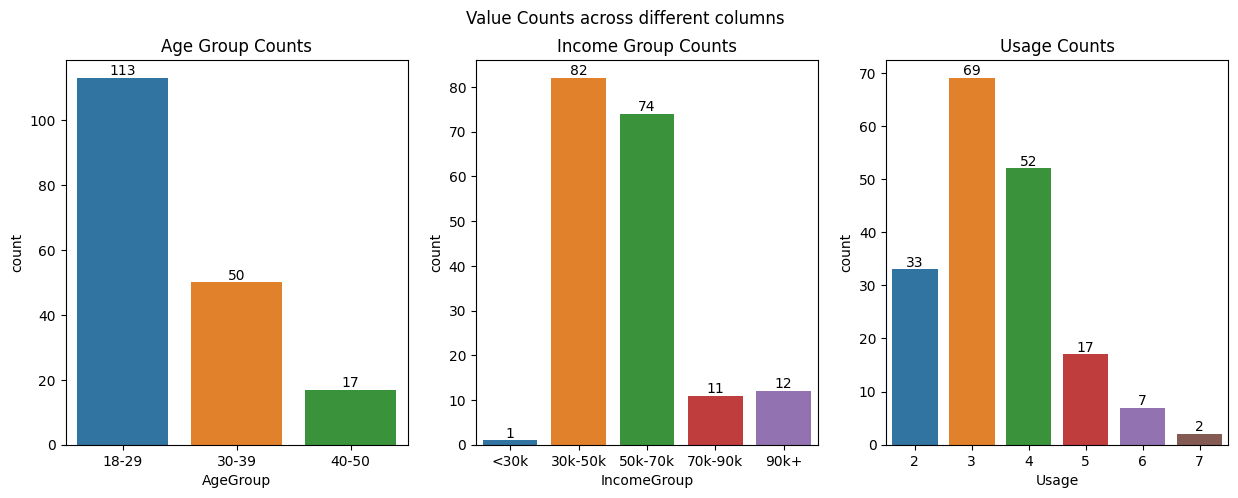

In [42]:
#Checking Count distribution of the values in each of the columns
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
a=sns.countplot(x=data.AgeGroup)
plt.title('Age Group Counts', fontsize=12)
a.bar_label(a.containers[0])

plt.subplot(1,3,2)
a=sns.countplot(x=data.IncomeGroup)
plt.title('Income Group Counts', fontsize=12)
a.bar_label(a.containers[0])

plt.subplot(1,3,3)
a=sns.countplot(x=data.Usage)
plt.title('Usage Counts', fontsize=12)
a.bar_label(a.containers[0])

plt.suptitle('Value Counts across different columns ')
plt.show()

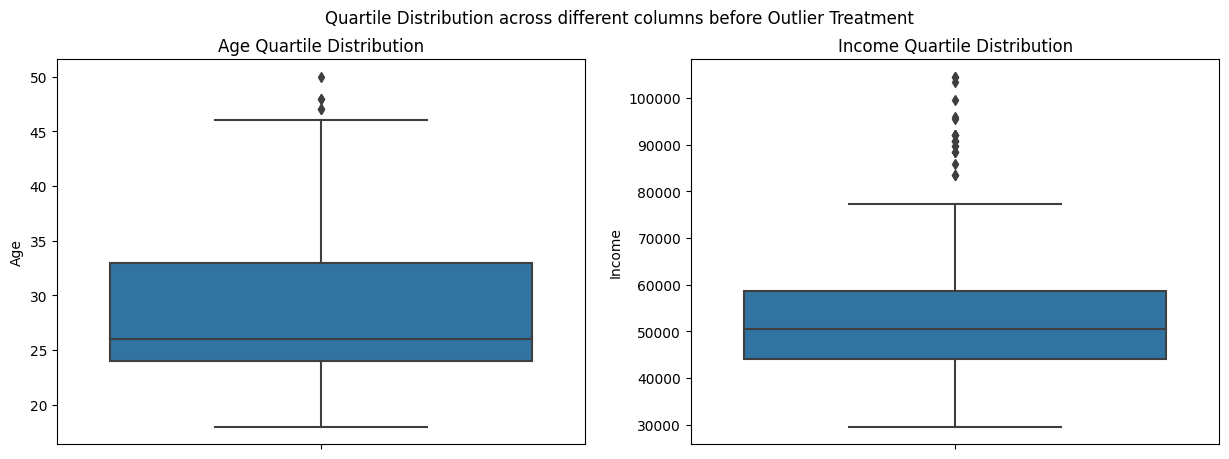

In [57]:
#Checking for Outliers in numeric columns
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
a=sns.boxplot(y=data.Age)
plt.title('Age Quartile Distribution', fontsize=12)

plt.subplot(1,2,2)
b=sns.boxplot(y=data.Income)
plt.title('Income Quartile Distribution', fontsize=12)

plt.suptitle('Quartile Distribution across different columns before Outlier Treatment')
plt.show()

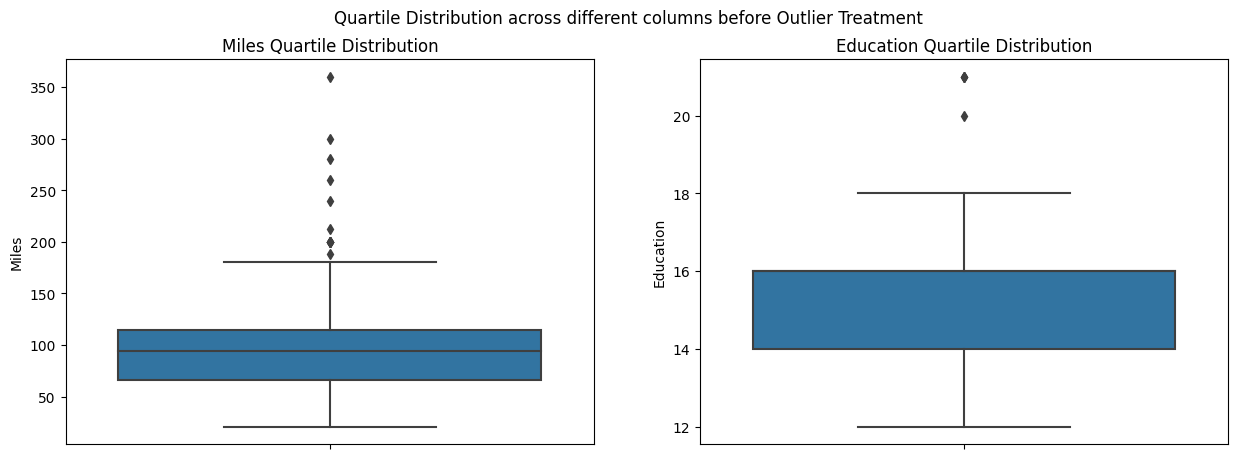

In [58]:
#Checking for Outliers in numeric columns
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
c=sns.boxplot(y=data.Miles)
plt.title('Miles Quartile Distribution', fontsize=12)

plt.subplot(1,2,2)
c=sns.boxplot(y=data.Education)
plt.title('Education Quartile Distribution', fontsize=12)

plt.suptitle('Quartile Distribution across different columns before Outlier Treatment')
plt.show()

In [9]:
#Outlier Treatment. Creating a new column with the outlier values being replaced with the Upper Limit.
#Creating a new column as it will help retain the original values if needed

data.loc[data['Age']>description.loc['Age','Upper Limit'],'NewAge']=description.loc['Age','Upper Limit']
data.loc[data['Income']>description.loc['Income','Upper Limit'],'NewIncome']=description.loc['Income','Upper Limit']
data.loc[data['Miles']>description.loc['Miles','Upper Limit'],'NewMiles']=description.loc['Miles','Upper Limit']
data.loc[data['Education']>description.loc['Education','Upper Limit'],'NewEducation']=description.loc['Education','Upper Limit']

#Filling the remaining values with original values
data['NewAge'].fillna(data['Age'],inplace=True)
data['NewMiles'].fillna(data['Miles'],inplace=True)
data['NewIncome'].fillna(data['Income'],inplace=True)
data['NewEducation'].fillna(data['Education'],inplace=True)

In [10]:
#Dataset after removal of Outliers from Age, Income, Miles and Education
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,IncomeGroup,Price,NewAge,NewIncome,NewMiles,NewEducation
0,KP281,18,Male,14,Single,3,4,29562,112,18-29,<30k,1500,18.0,29562.0,112.0,14.0
1,KP281,19,Male,15,Single,2,3,31836,75,18-29,30k-50k,1500,19.0,31836.0,75.0,15.0
2,KP281,19,Female,14,Partnered,4,3,30699,66,18-29,30k-50k,1500,19.0,30699.0,66.0,14.0
3,KP281,19,Male,12,Single,3,3,32973,85,18-29,30k-50k,1500,19.0,32973.0,85.0,12.0
4,KP281,20,Male,13,Partnered,4,2,35247,47,18-29,30k-50k,1500,20.0,35247.0,47.0,13.0


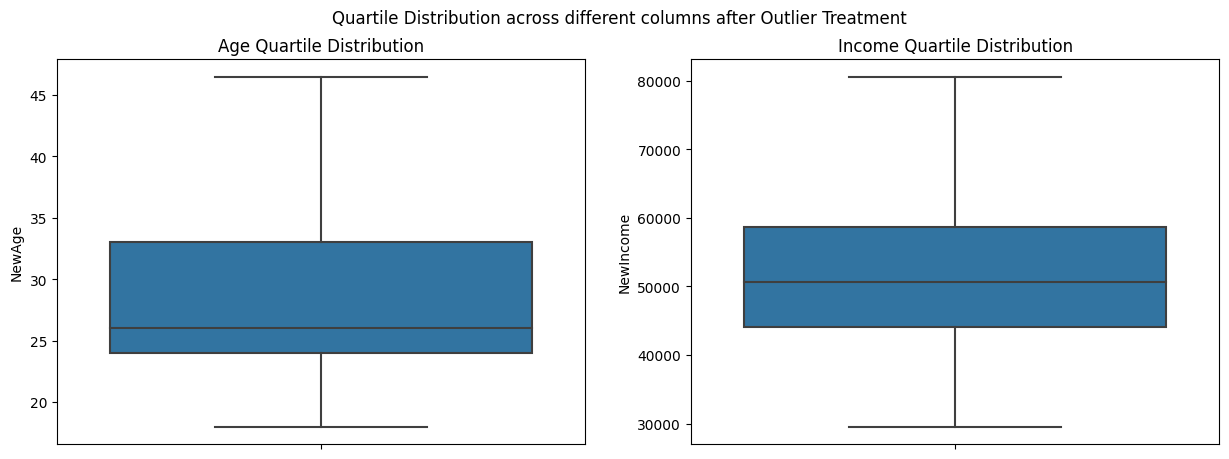

In [85]:
#Quartile Distribution across different columns after Outlier Treatment
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
a=sns.boxplot(y=data.NewAge)
plt.title('Age Quartile Distribution', fontsize=12)

plt.subplot(1,2,2)
b=sns.boxplot(y=data.NewIncome)
plt.title('Income Quartile Distribution', fontsize=12)

plt.suptitle('Quartile Distribution across different columns after Outlier Treatment')
plt.show()

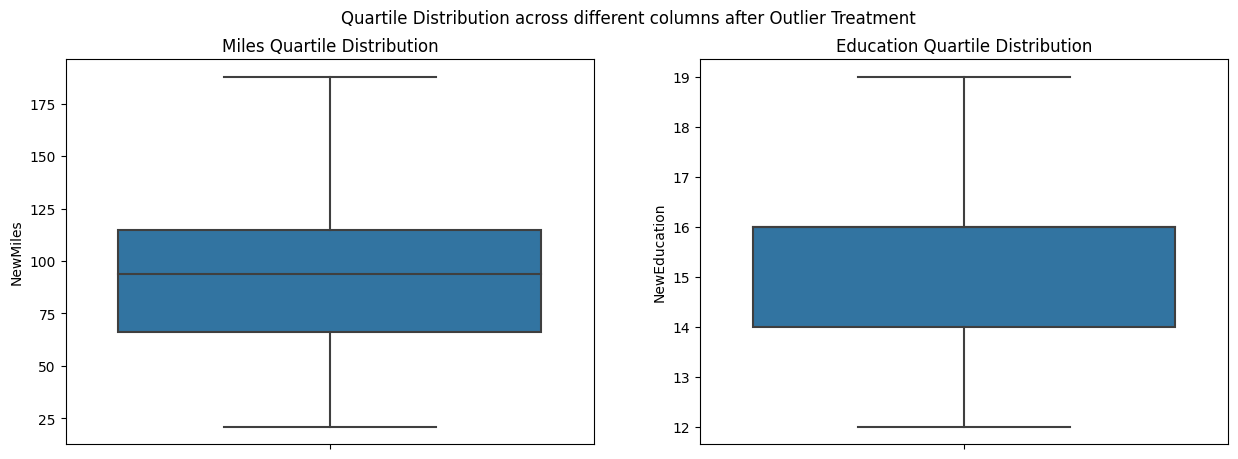

In [86]:
#Quartile Distribution across different columns before Outlier Treatment
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
c=sns.boxplot(y=data.NewMiles)
plt.title('Miles Quartile Distribution', fontsize=12)

plt.subplot(1,2,2)
c=sns.boxplot(y=data.NewEducation)
plt.title('Education Quartile Distribution', fontsize=12)

plt.suptitle('Quartile Distribution across different columns after Outlier Treatment')
plt.show()

# ==========================================================

# Bi-variate Analysis

*check effect of Age on Product
*check effect of Gender on type of Product bought
*check effect of Education on Product
*check effect of MaritalStatus on Product
*check effect of Usage on Product
*check effect of Miles on Product
*check effect of Income on Product

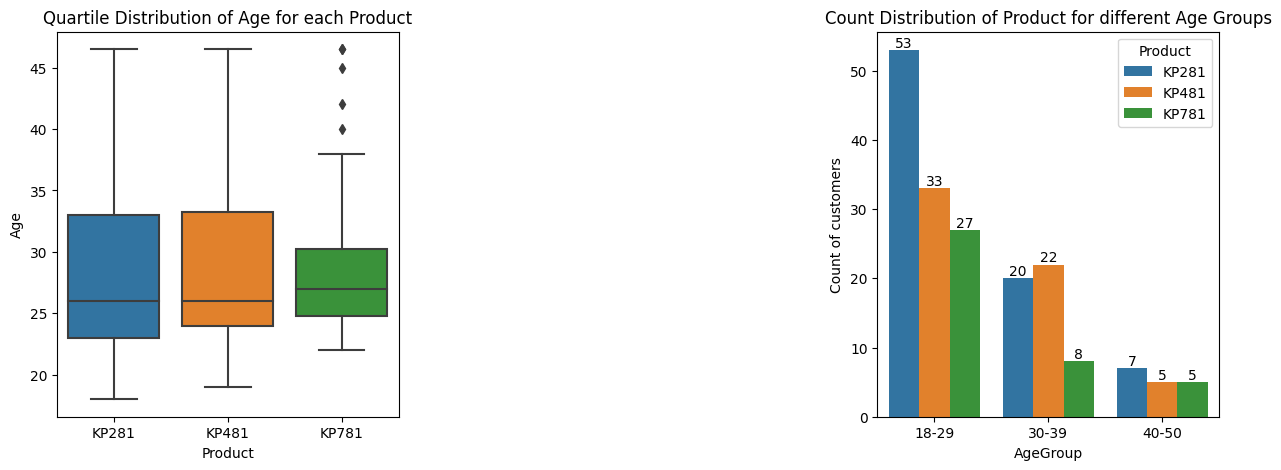

In [25]:
#Check Effect of Age on Product
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(data=data, x='Product',y='NewAge')
plt.title('Quartile Distribution of Age for each Product')
plt.ylabel('Age')

plt.subplot(1,3,3)
a=sns.countplot(data=data, x='AgeGroup',hue='Product')
plt.title('Count Distribution of Product for different Age Groups')
plt.ylabel('Count of customers')
a.bar_label(a.containers[0])
a.bar_label(a.containers[1])
a.bar_label(a.containers[2])

plt.show()

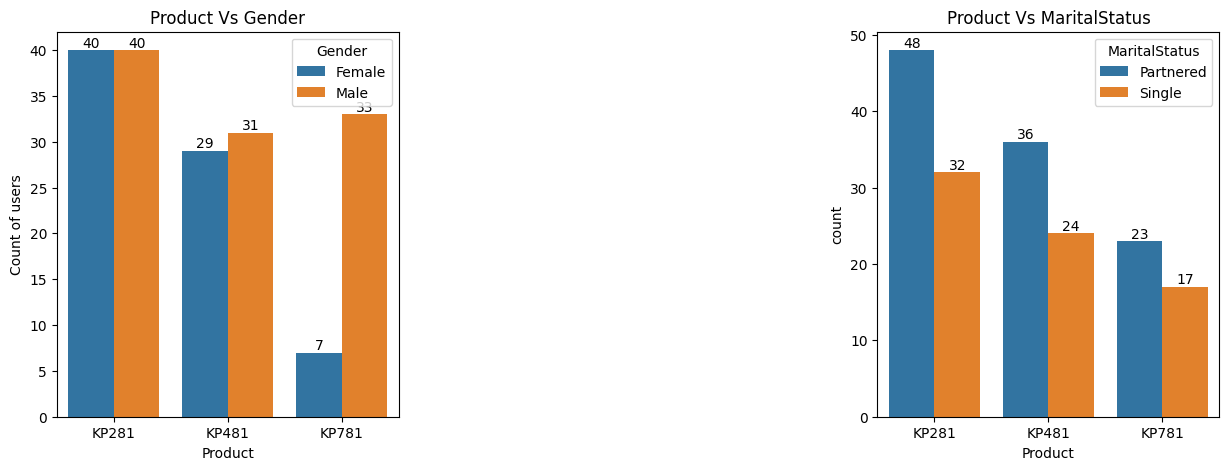

In [14]:
#check effect of Gender and Marital Status on type of Product bought
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
a=sns.countplot(x=data['Product'],hue=data['Gender'])
a.bar_label(a.containers[0])
a.bar_label(a.containers[1])
plt.title("Product Vs Gender")
plt.ylabel('Count of users')
plt.subplot(1,3,3)
b=sns.countplot(x=data.Product,hue=data["MaritalStatus"])
b.bar_label(b.containers[0])
b.bar_label(b.containers[1])
plt.title("Product Vs MaritalStatus")
plt.show()

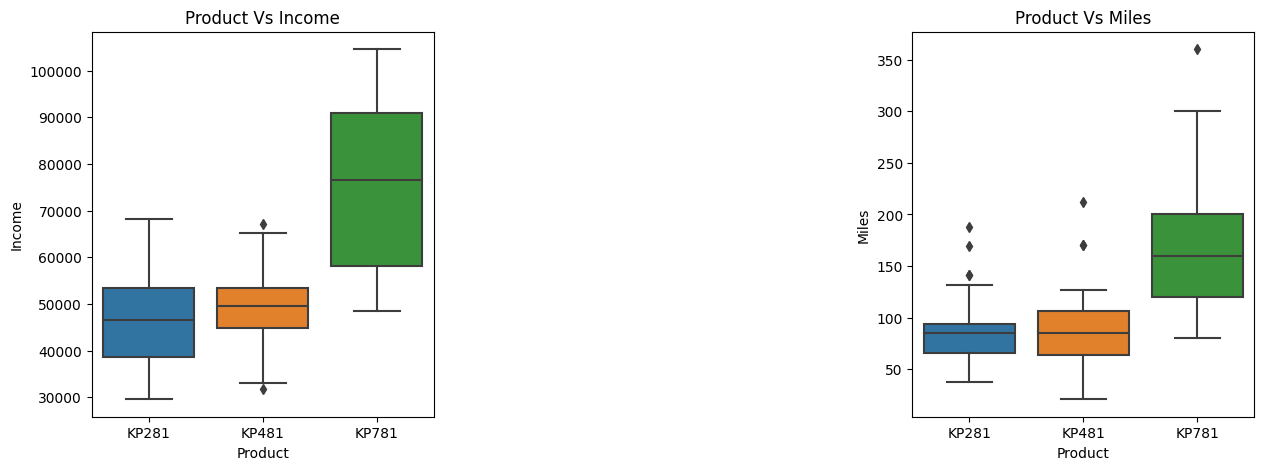

In [15]:
#check effect of Income & Miles of usage on type of Product bought
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
a=sns.boxplot(x=data['Product'],y=data['Income'])
plt.title("Product Vs Income")

plt.subplot(1,3,3)
b=sns.boxplot(x=data.Product,y=data["Miles"])
plt.title("Product Vs Miles")
plt.show()

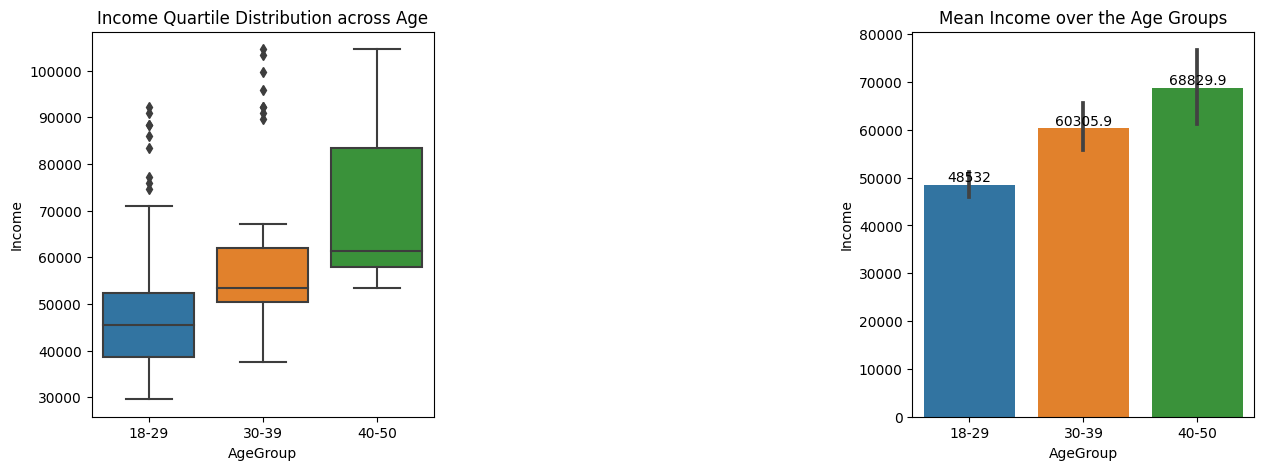

In [26]:
#Checking the income, fitness level and product distribution over the age groups
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(y=data['Income'],x=data['AgeGroup'])
plt.title('Income Quartile Distribution across Age')

plt.subplot(1,3,3)
a=sns.barplot(data=data, x='AgeGroup',y='Income')
a.bar_label(a.containers[0])
plt.title('Mean Income over the Age Groups')

plt.show()

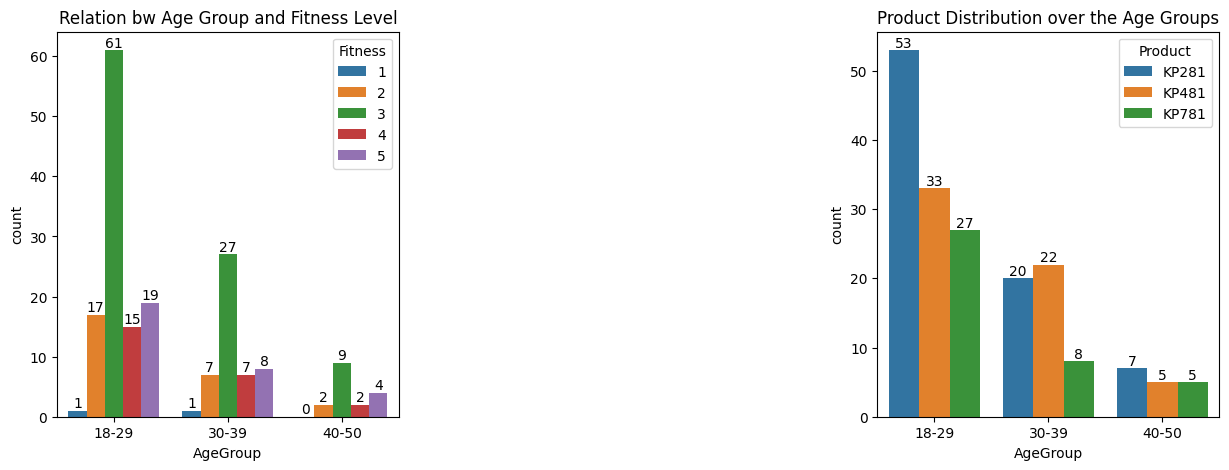

In [24]:
#Checking the income, fitness level and product distribution over the age groups
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
a=sns.countplot(data=data, x='AgeGroup', hue="Fitness")
a.bar_label(a.containers[0])
a.bar_label(a.containers[1])
a.bar_label(a.containers[2])
a.bar_label(a.containers[3])
a.bar_label(a.containers[4])
plt.title('Relation bw Age Group and Fitness Level')

plt.subplot(1,3,3)
a=sns.countplot(data=data, x='AgeGroup',hue='Product')
a.bar_label(a.containers[0])
a.bar_label(a.containers[1])
a.bar_label(a.containers[2])
plt.title('Product Distribution over the Age Groups')
plt.show()

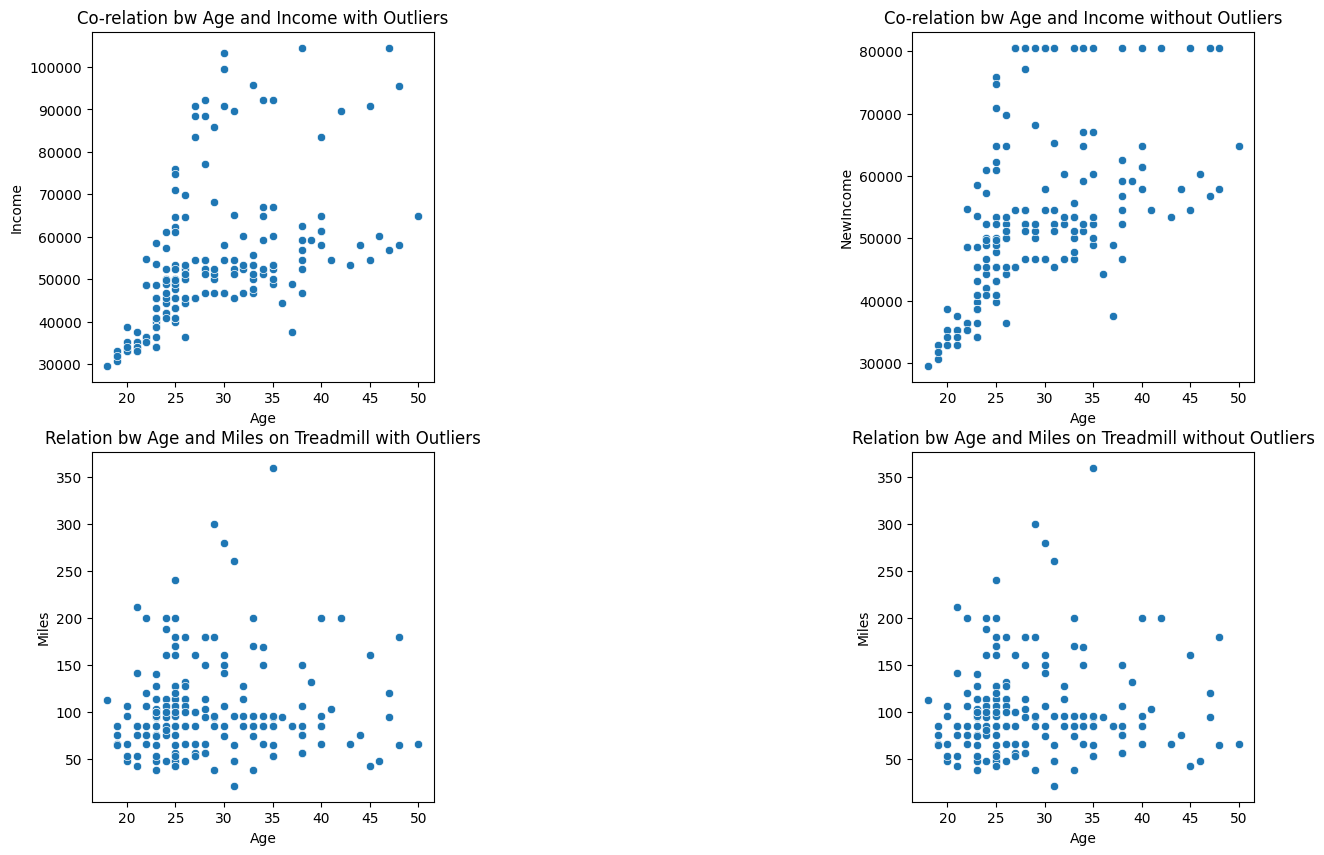

In [28]:
#Checking for co-relation between Age,Income and Miles
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.scatterplot(data=data, x='Age', y="Income")
plt.title('Co-relation bw Age and Income with Outliers')

plt.subplot(2,3,3)
sns.scatterplot(data=data, x='Age', y="NewIncome")
plt.title('Co-relation bw Age and Income without Outliers')

plt.subplot(2,3,4)
sns.scatterplot(data=data, x='Age',y='Miles')
plt.title('Relation bw Age and Miles on Treadmill with Outliers')

plt.subplot(2,3,6)
sns.scatterplot(data=data, x='Age',y='Miles')
plt.title('Relation bw Age and Miles on Treadmill without Outliers')

plt.show()

In [29]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,IncomeGroup,Price,NewAge,NewIncome,NewMiles,NewEducation
0,KP281,18,Male,14,Single,3,4,29562,112,18-29,<30k,1500,18.0,29562.0,112.0,14.0
1,KP281,19,Male,15,Single,2,3,31836,75,18-29,30k-50k,1500,19.0,31836.0,75.0,15.0
2,KP281,19,Female,14,Partnered,4,3,30699,66,18-29,30k-50k,1500,19.0,30699.0,66.0,14.0
3,KP281,19,Male,12,Single,3,3,32973,85,18-29,30k-50k,1500,19.0,32973.0,85.0,12.0
4,KP281,20,Male,13,Partnered,4,2,35247,47,18-29,30k-50k,1500,20.0,35247.0,47.0,13.0


In [47]:
#Checking the revenue accrued over the age groups
subset=data.loc[:,['AgeGroup','Product','Price']]
subset['Price']=subset['Price'].astype('int')
subset=subset.groupby(['AgeGroup','Product'])[['Price']].sum().reset_index()
subset.head(15)

,AgeGroup,Product,Price
0,18-29,KP281,79500
1,18-29,KP481,57750
2,18-29,KP781,67500
3,30-39,KP281,30000
4,30-39,KP481,38500
5,30-39,KP781,20000
6,40-50,KP281,10500
7,40-50,KP481,8750
8,40-50,KP781,12500


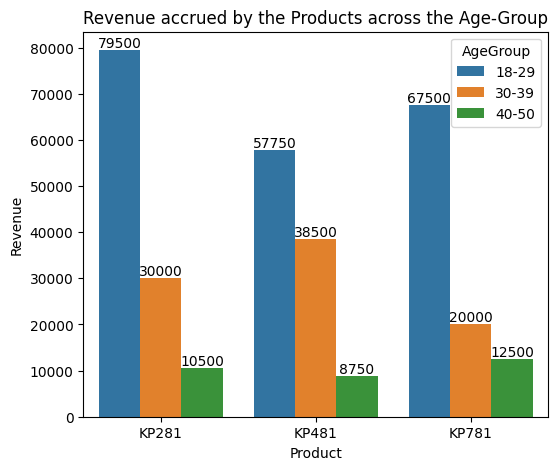

In [56]:
plt.figure(figsize=(6,5))
a=sns.barplot(hue=subset['AgeGroup'],y=subset['Price'],x=subset['Product'])
a.bar_label(a.containers[0])
a.bar_label(a.containers[1])
a.bar_label(a.containers[2])
plt.ylabel('Revenue')
plt.title('Revenue accrued by the Products across the Age-Group')
plt.show()

In [63]:
#Generating a correlation matrix to generate heatmap bw correlation of 2 columns

correlation_matrix = data.corr()
print(correlation_matrix)

                   Age  Education     Usage   Fitness    Income     Miles  \
Age           1.000000   0.280496  0.015064  0.061105  0.513414  0.036618   
Education     0.280496   1.000000  0.395155  0.410581  0.625827  0.307284   
Usage         0.015064   0.395155  1.000000  0.668606  0.519537  0.759130   
Fitness       0.061105   0.410581  0.668606  1.000000  0.535005  0.785702   
Income        0.513414   0.625827  0.519537  0.535005  1.000000  0.543473   
Miles         0.036618   0.307284  0.759130  0.785702  0.543473  1.000000   
NewAge        0.999141   0.281568  0.017140  0.060711  0.515366  0.038337   
NewIncome     0.539339   0.646493  0.513160  0.511659  0.979773  0.527515   
NewMiles      0.023314   0.357905  0.789734  0.832008  0.522142  0.947319   
NewEducation  0.295817   0.987877  0.397182  0.417911  0.629381  0.311916   

                NewAge  NewIncome  NewMiles  NewEducation  
Age           0.999141   0.539339  0.023314      0.295817  
Education     0.281568   0.64649

In [65]:
correlation_matrix.drop(columns=(['NewAge','NewIncome','NewMiles','NewEducation']),inplace=True)

In [66]:
correlation_matrix.drop(['NewAge','NewIncome','NewMiles','NewEducation'],inplace=True)

In [67]:
correlation_matrix

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<Axes: >

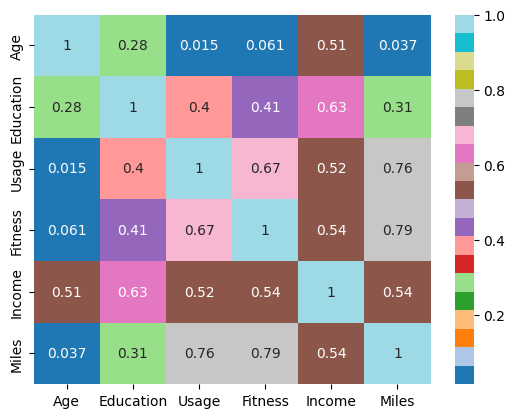

In [73]:
sns.heatmap(correlation_matrix,annot=True,cmap='tab20')

# ================Customer Profiling========================

In [95]:
#Probability Distribution of Product across gender
pd.crosstab([data.Gender],data.Product,margins=True,normalize=True).round(3)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.222,0.161,0.039,0.422
Male,0.222,0.172,0.183,0.578
All,0.444,0.333,0.222,1.000


In [96]:
#Probability Distribution of Product across Gender and Marital Status
pd.crosstab([data.Gender,data.MaritalStatus],[data.Product],margins=True,normalize=True).round(3)

Product               KP281  KP481  KP781    All
Gender MaritalStatus                            
Female Partnered      0.150  0.083  0.022  0.256
       Single         0.072  0.078  0.017  0.167
Male   Partnered      0.117  0.117  0.106  0.339
       Single         0.106  0.056  0.078  0.239
All                   0.444  0.333  0.222  1.000

In [97]:
#Probability Distribution of Product across Gender,Age Group and Marital Status
pd.crosstab([data.Gender,data.MaritalStatus,data.AgeGroup],[data.Product],margins=True,normalize=True).round(3)

Product                        KP281  KP481  KP781    All
Gender MaritalStatus AgeGroup                            
Female Partnered     18-29     0.117  0.039  0.011  0.167
                     30-39     0.022  0.039  0.011  0.072
                     40-50     0.011  0.006  0.000  0.017
       Single        18-29     0.039  0.044  0.017  0.100
                     30-39     0.028  0.028  0.000  0.056
                     40-50     0.006  0.006  0.000  0.011
Male   Partnered     18-29     0.056  0.056  0.067  0.178
                     30-39     0.039  0.044  0.028  0.111
                     40-50     0.022  0.017  0.011  0.050
       Single        18-29     0.083  0.044  0.056  0.183
                     30-39     0.022  0.011  0.006  0.039
                     40-50     0.000  0.000  0.017  0.017
All                            0.444  0.333  0.222  1.000

In [99]:
#Probability Distribution of Product across Gender and Age Group
pd.crosstab([data.Gender,data.AgeGroup],data.Product,margins=True,normalize=True).round(3)

Product          KP281  KP481  KP781    All
Gender AgeGroup                            
Female 18-29     0.156  0.083  0.028  0.267
       30-39     0.050  0.067  0.011  0.128
       40-50     0.017  0.011  0.000  0.028
Male   18-29     0.139  0.100  0.122  0.361
       30-39     0.061  0.056  0.033  0.150
       40-50     0.022  0.017  0.028  0.067
All              0.444  0.333  0.222  1.000

In [100]:
#Probability Distribution of Product across Gender, Age Group and Income Group
pd.crosstab([data.Gender,data.AgeGroup,data.IncomeGroup],data.Product,margins=True,normalize=True).round(3)

Product                      KP281  KP481  KP781    All
Gender AgeGroup IncomeGroup                            
Female 18-29    30k-50k      0.122  0.067  0.000  0.189
                50k-70k      0.033  0.017  0.022  0.072
                90k+         0.000  0.000  0.006  0.006
       30-39    30k-50k      0.022  0.017  0.000  0.039
                50k-70k      0.028  0.050  0.000  0.078
                90k+         0.000  0.000  0.011  0.011
       40-50    50k-70k      0.017  0.011  0.000  0.028
Male   18-29    30k-50k      0.094  0.083  0.028  0.206
                50k-70k      0.039  0.017  0.044  0.100
                70k-90k      0.000  0.000  0.044  0.044
                90k+         0.000  0.000  0.006  0.006
                <30k         0.006  0.000  0.000  0.006
       30-39    30k-50k      0.022  0.000  0.000  0.022
                50k-70k      0.039  0.056  0.000  0.094
                70k-90k      0.000  0.000  0.006  0.006
                90k+         0.000  0.000  0.028  0.028
       40-50    50k-70k      0.022  0.017  0.000  0.039
                70k-90k      0.000  0.000  0.011  0.011
                90k+         0.000  0.000  0.017  0.017
All                          0.444  0.333  0.222  1.000

In [101]:
#Probability Distribution of Product across Gender & Income Group
pd.crosstab([data.Gender,data.IncomeGroup],data.Product,margins=True,normalize=True).round(3)

Product             KP281  KP481  KP781    All
Gender IncomeGroup                            
Female 30k-50k      0.144  0.083  0.000  0.228
       50k-70k      0.078  0.078  0.022  0.178
       90k+         0.000  0.000  0.017  0.017
Male   30k-50k      0.117  0.083  0.028  0.228
       50k-70k      0.100  0.089  0.044  0.233
       70k-90k      0.000  0.000  0.061  0.061
       90k+         0.000  0.000  0.050  0.050
       <30k         0.006  0.000  0.000  0.006
All                 0.444  0.333  0.222  1.000

In [103]:
#Probability Distribution of Product across Gender & Usage
pd.crosstab([data.Gender,data.Usage],data.Product,margins=True,normalize=True).round(3)

Product       KP281  KP481  KP781    All
Gender Usage                            
Female 2      0.072  0.039  0.000  0.111
       3      0.106  0.078  0.000  0.183
       4      0.039  0.028  0.011  0.078
       5      0.006  0.017  0.017  0.039
       6      0.000  0.000  0.011  0.011
Male   2      0.033  0.039  0.000  0.072
       3      0.100  0.094  0.006  0.200
       4      0.083  0.039  0.089  0.211
       5      0.006  0.000  0.050  0.056
       6      0.000  0.000  0.028  0.028
       7      0.000  0.000  0.011  0.011
All           0.444  0.333  0.222  1.000

In [105]:
#Probability Distribution of Product across Gender & Fitness Level
pd.crosstab([data.Gender,data.Fitness],data.Product,margins=True,normalize=True).round(3)

Product         KP281  KP481  KP781    All
Gender Fitness                            
Female 1        0.000  0.006  0.000  0.006
       2        0.056  0.033  0.000  0.089
       3        0.144  0.100  0.006  0.250
       4        0.017  0.022  0.006  0.044
       5        0.006  0.000  0.028  0.033
Male   1        0.006  0.000  0.000  0.006
       2        0.022  0.033  0.000  0.056
       3        0.156  0.117  0.017  0.289
       4        0.033  0.022  0.033  0.089
       5        0.006  0.000  0.133  0.139
All             0.444  0.333  0.222  1.000

In [106]:
#Probability Distribution of Product across Gender & Education Level
pd.crosstab([data.Gender,data.Education],data.Product,margins=True,normalize=True).round(3)

Product           KP281  KP481  KP781    All
Gender Education                            
Female 13         0.000  0.006  0.000  0.006
       14         0.100  0.067  0.000  0.167
       15         0.011  0.000  0.000  0.011
       16         0.106  0.078  0.011  0.194
       18         0.006  0.011  0.022  0.039
       21         0.000  0.000  0.006  0.006
Male   12         0.011  0.006  0.000  0.017
       13         0.017  0.006  0.000  0.022
       14         0.067  0.061  0.011  0.139
       15         0.011  0.006  0.000  0.017
       16         0.111  0.094  0.072  0.278
       18         0.006  0.000  0.083  0.089
       20         0.000  0.000  0.006  0.006
       21         0.000  0.000  0.011  0.011
All               0.444  0.333  0.222  1.000